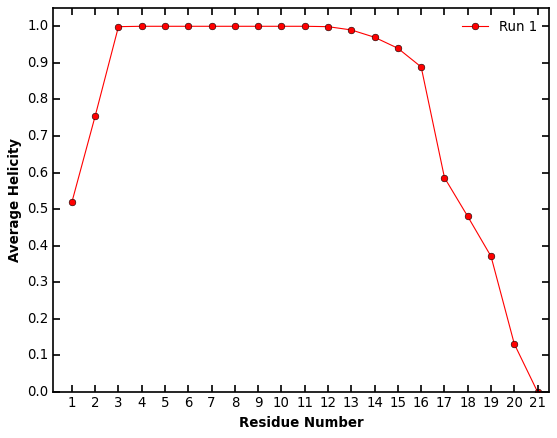

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
#mpl.use('pdf')
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['axes.linewidth']= 1.5
plt.figure(facecolor='white')
files=["sec_st.dat"]
file_counter=0
for file in files:
    data=np.genfromtxt(file,dtype=None,encoding=None,delimiter='')
    data=np.char.array(data,unicode=True)
    lines=data.shape[0]
    nres=21 #number of residues in peptide chain
    X=[] #creating an empty list to store fraction helix values

    #generating an empty matrix to store values of helix as 1 else 0
    rows = lines
    cols = nres

    mat = [[0 for i in range(cols)] for i in range(rows)]
    ##
    a=0
    while a<lines:
        b=1
        while b<nres+1: 
            #print(data[a,b])
            #25 => is number of residues+1
            #a is line b is column
            if data[a,b]=='H':
                mat[a][b-1]=1
            #else:
                #mat[a][b]=0
            b+=1
        #print("**Next-Line**")
        a+=1
    ##Part2
    c=1000 #*********************************change for equillibration time
    counter=lines-c
    d=0
    result1=[]
    while d<nres:
        c=1000
        helicity=0
        while c<lines:
            helicity=helicity+mat[c][d]
            #print(mat[c][d])
            c=c+1
        result1.append(helicity)
        #print("**Next-Line**")
        d+=1
    final_result = [z / counter for z in result1]
    ##Plotting
    colors=['r','g','b','cyan']
    marker=['o','s','p','v']
    Simulation_run=file_counter+1
    label="Run "+str(Simulation_run)
    plt.plot(np.arange(1,nres+1,1),final_result, linestyle='-', marker=marker[file_counter], color=colors[file_counter],label=label)
    file_counter+=1
legend = plt.legend(numpoints = 1, loc='best',frameon=False, fontsize=12)
legend.get_frame().set_facecolor('none')
plt.yticks(np.arange(0,1.1,.1))
plt.xticks(np.arange(0,nres+1,1))
plt.ylim(0.0,1.05)
plt.xlim(0.2,nres+0.5)
plt.ylabel("Average Helicity", fontweight="bold")
plt.xlabel("Residue Number", fontweight="bold")
#plotfile='helicity-eachresidue.png'
#plt.savefig(plotfile, dpi=300, bbox_inches='tight')
plt.show()